In [ ]:
%pip install matplotlib seaborn



In [ ]:

!pip install pandas scikit-learn matplotlib seaborn nltk


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df_raw = pd.read_csv("/content/mail_data.csv")

print("Data shape:", df_raw.shape)
df_raw.head()

Data shape: (5572, 2)


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = ''.join([c for c in text if c not in string.punctuation])  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

In [ ]:
df_raw['clean_message'] = df_raw['Message'].apply(preprocess_text)

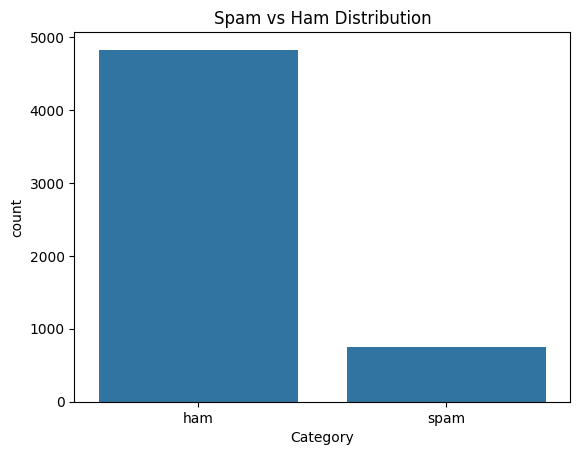

In [ ]:
sns.countplot(x='Category', data=df_raw)
plt.title("Spam vs Ham Distribution")
plt.show()

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_raw['clean_message'])
y = df_raw['Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [ ]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.967713004484305
Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



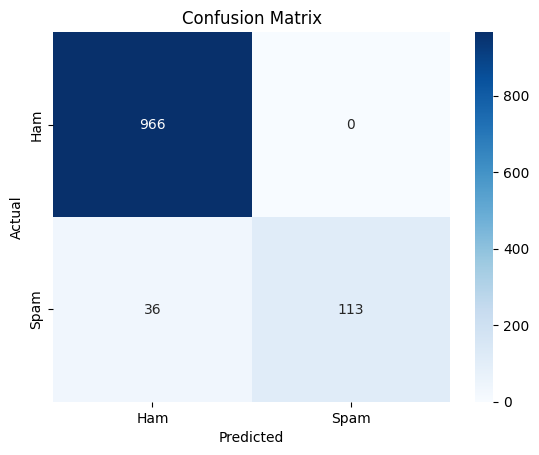

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9533632286995516


In [ ]:
# Get input from the user
while True:


  input_message = input("Enter a message to check if it's spam or ham: ")

  # Preprocess the input message
  cleaned_input_message = preprocess_text(input_message)

  # Vectorize the cleaned input message using the fitted vectorizer
  input_message_vectorized = vectorizer.transform([cleaned_input_message])

#Make a prediction using the trained Naive Bayes model (using nb_model)
  prediction = nb_model.predict(input_message_vectorized)

#Display the prediction
  if prediction[0] == 'spam':
      print("Prediction: This message is SPAM")
  else:
      print("Prediction: This message is HAM")

Enter a message to check if it's spam or ham: Congratulations! You have been chosen to win a $1,000 gift card instantly. Act now to claim your prize by clicking the link below. Don't miss out on this once-in-a-lifetime opportunity! This message is not spam and your information is safe. Click here to claim now!
Prediction: This message is SPAM
Enter a message to check if it's spam or ham: Dear Team, I hope this message finds you well. I wanted to remind everyone about the meeting scheduled for Friday at 10 AM to discuss the upcoming project timeline. Please review the attached agenda and be prepared to share your updates. Thank you for your cooperation.
Prediction: This message is HAM
Enter a message to check if it's spam or ham: Dear User, Due to recent suspicious activity detected on your Bank of America account, we have temporarily suspended access to protect your funds. To reinstate your account immediately and avoid permanent closure, please verify your identity by clicking the sec